In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [31]:
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')

In [32]:
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [33]:
# D1 - Identify the Variables (Choosing 6 Continuous Variables and Excluding Dependent Variable 'Price')
continuous_variables = ["SquareFootage", "BackyardSpace", "CrimeRate", "SchoolRating", "AgeOfHome", "RenovationQuality"]

# Filter dataset for independent variables only
df_continuous = df[continuous_variables]

In [34]:
#D2 - Standardize the Dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_continuous)

In [35]:
# Convert scaled data back to a DataFrame for saving
scaled_df = pd.DataFrame(scaled_data, columns=continuous_variables)

# Save the standardized dataset
scaled_df.to_csv('D600_Task3_Cleaned_Standardized_Dataset.csv', index=False)

print("Standardized dataset saved as 'D600_Task3_Cleaned_Standardized_Dataset.csv'")

Standardized dataset saved as 'D600_Task3_Cleaned_Standardized_Dataset.csv'


In [36]:
#D3 - Descriptive Statistics
df_with_price = df[["Price"] + continuous_variables]

# Calculate descriptive statistics for all variables, including 'Price'
descriptive_stats_with_price = df_with_price.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Dependent and Independent Variables:")
print(descriptive_stats_with_price)

# Save descriptive statistics as a CSV file for inclusion in reports
descriptive_stats_with_price.to_csv('D600_Task3_Descriptive_Statistics_with_Price.csv')

print("Descriptive statistics saved as 'D600_Task3_Descriptive_Statistics_with_Price.csv'")


Descriptive Statistics for Dependent and Independent Variables:
              Price  SquareFootage  BackyardSpace    CrimeRate  SchoolRating  \
count  7.000000e+03    7000.000000    7000.000000  7000.000000   7000.000000   
mean   3.072820e+05    1048.947459     511.507029    31.226194      6.942923   
std    1.501734e+05     426.010482     279.926549    18.025327      1.888148   
min    8.500000e+04     550.000000       0.390000     0.030000      0.220000   
25%    1.921075e+05     660.815000     300.995000    17.390000      5.650000   
50%    2.793230e+05     996.320000     495.965000    30.385000      7.010000   
75%    3.918781e+05    1342.292500     704.012500    43.670000      8.360000   
max    1.046676e+06    2874.700000    1631.360000    99.730000     10.000000   

         AgeOfHome  RenovationQuality  
count  7000.000000        7000.000000  
mean     46.797046           5.003357  
std      31.779701           1.970428  
min       0.010000           0.010000  
25%      20.755

In [37]:
#E1 - Perform PCA to compute all principal components
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Convert PCA output to a DataFrame
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
df_pca = pd.DataFrame(pca_data, columns=pca_columns)

# Save the matrix of all principal components
df_pca.to_csv('D600_Task3_PCA_Matrix.csv', index=False)

print("Matrix of all principal components saved as 'D600_Task3_PCA_Matrix.csv'")

# Display the PCA Component Matrix (Eigenvectors)
df_pca_matrix = pd.DataFrame(
    pca.components_,
    columns=["SquareFootage", "BackyardSpace", "CrimeRate", "SchoolRating", "AgeOfHome", "RenovationQuality"],
    index=pca_columns
)

print("PCA Component Matrix (Eigenvectors):")
print(df_pca_matrix)

Matrix of all principal components saved as 'D600_Task3_PCA_Matrix.csv'
PCA Component Matrix (Eigenvectors):
     SquareFootage  BackyardSpace  CrimeRate  SchoolRating  AgeOfHome  \
PC1       0.475839       0.158756  -0.222476      0.559061  -0.215191   
PC2       0.338373      -0.391497   0.768737      0.025337   0.308447   
PC3       0.143962       0.876295   0.407054     -0.210577  -0.034795   
PC4       0.061718       0.191351  -0.315830      0.072766   0.923164   
PC5       0.769413      -0.119406  -0.283034     -0.491873  -0.071341   
PC6      -0.206276      -0.052549  -0.118314     -0.628675  -0.004608   

     RenovationQuality  
PC1           0.583114  
PC2           0.213298  
PC3          -0.011699  
PC4           0.047958  
PC5          -0.258087  
PC6           0.738537  


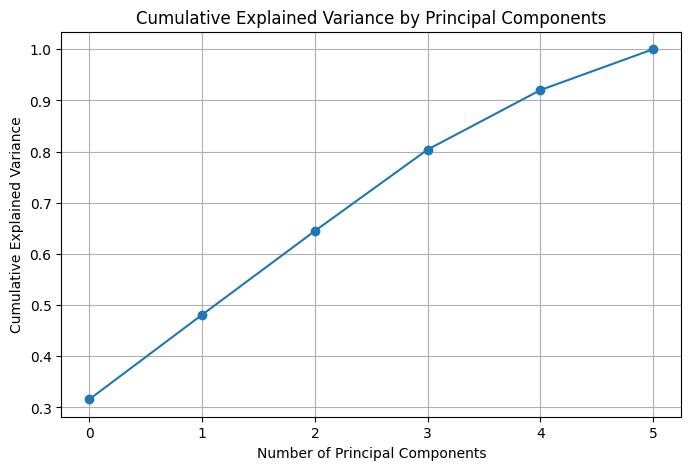

Explained variance ratios saved as 'D600_Task3_Explained_Variance.csv'


In [38]:
#E2 - Calculate explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot (Elbow Rule)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Save the explained variance ratios for reporting
explained_variance_df = pd.DataFrame({
    'Principal Component': pca_columns,
    'Explained Variance Ratio': explained_variance
})
explained_variance_df.to_csv('D600_Task3_Explained_Variance.csv', index=False)

print("Explained variance ratios saved as 'D600_Task3_Explained_Variance.csv'")

In [39]:
#E3 - Display variance of each principal component
for i, var_ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var_ratio:.4f} ({var_ratio * 100:.2f}%)")

PC1: 0.3160 (31.60%)
PC2: 0.1652 (16.52%)
PC3: 0.1637 (16.37%)
PC4: 0.1590 (15.90%)
PC5: 0.1162 (11.62%)
PC6: 0.0799 (7.99%)


In [40]:
#F1 - Split the Data Set add back in the Dependent 'Price' Variable
# Determine the number of components to retain dynamically
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.85) + 1  # Retain enough to explain 85% variance
print(f"Number of components selected: {n_components}")

# Add back the dependent variable 'Price'
df_pca['Price'] = df['Price']

# Select the principal components and add 'Price'
selected_pca_columns = [f"PC{i+1}" for i in range(n_components)]
df_pca_selected = df_pca[selected_pca_columns + ['Price']]

# Split the data into training (80%) and testing (20%)
train_data, test_data = train_test_split(df_pca_selected, test_size=0.2, random_state=42)

# Save the datasets as CSV files
train_data.to_csv('D600_Task3_Training_Dataset.csv', index=False)
test_data.to_csv('D600_Task3_Test_Dataset.csv', index=False)

print("Training and test datasets saved as 'D600_Task3_Training_Dataset.csv' and 'D600_Task3_Test_Dataset.csv'")

Number of components selected: 5
Training and test datasets saved as 'D600_Task3_Training_Dataset.csv' and 'D600_Task3_Test_Dataset.csv'


In [41]:
#F2 - Regression Model
# Load the training dataset
train_data = pd.read_csv('D600_Task3_Training_Dataset.csv')

# Separate the independent variables (PC1, PC2, ..., PCn) and dependent variable (Price)
X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Initial regression model
model = sm.OLS(y_train, X_train).fit()

print("Initial Model Summary:")
print(model.summary())

Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     760.8
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:37:06   Log-Likelihood:                -73285.
No. Observations:                5600   AIC:                         1.466e+05
Df Residuals:                    5594   BIC:                         1.466e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.079e+05   1561.

In [42]:
#F2 Optimize the Model
# Backward elimination process
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)  # Ensure constant term is included
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Dropping '{excluded_feature}' with p-value {max_p_value:.4f}")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model

# Optimize the regression model using backward elimination
optimized_model = backward_elimination(X_train, y_train)

# Display the summary of the optimized model
print("\nOptimized Model Summary:")
print(optimized_model.summary())


Dropping 'PC4' with p-value 0.5132

Optimized Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     951.0
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:37:06   Log-Likelihood:                -73285.
No. Observations:                5600   AIC:                         1.466e+05
Df Residuals:                    5595   BIC:                         1.466e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [43]:
#F2 - Extract the Model Parameters
r_squared = optimized_model.rsquared
adjusted_r_squared = optimized_model.rsquared_adj
f_stat = optimized_model.fvalue
prob_f_stat = optimized_model.f_pvalue
coefficients = optimized_model.params
p_values = optimized_model.pvalues

# Display extracted model parameters
print("\nExtracted Model Parameters:")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"F-statistic: {f_stat}")
print(f"Probability F-statistic: {prob_f_stat}")
print("Coefficient Estimates:")
print(coefficients)
print("P-values:")
print(p_values)

# Save optimized model summary to a file for reporting
with open('D600_Task3_Optimized_Model_Summary.txt', 'w') as f:
    f.write(optimized_model.summary().as_text())

print("Optimized model summary saved as 'D600_Task3_Optimized_Model_Summary.txt'")


Extracted Model Parameters:
R-squared: 0.4047256171061463
Adjusted R-squared: 0.40430004113982365
F-statistic: 951.0067511643078
Probability F-statistic: 0.0
Coefficient Estimates:
const    307918.186286
PC1       64926.004573
PC2       27078.973234
PC3        4860.666762
PC5       25868.182203
dtype: float64
P-values:
const    0.000000e+00
PC1      0.000000e+00
PC2      2.938819e-65
PC3      2.054152e-03
PC5      1.196257e-42
dtype: float64
Optimized model summary saved as 'D600_Task3_Optimized_Model_Summary.txt'


In [44]:
#F3 - Predict on the training set using the optimized model
y_train_pred = optimized_model.predict(X_train[['const', 'PC1', 'PC2', 'PC3', 'PC5']])

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")

Mean Squared Error (MSE) on Training Set: 13627391442.97


In [45]:
#F4 - Predict on the Test Set using Optimized Model
# Load the test dataset
test_data = pd.read_csv('D600_Task3_Test_Dataset.csv')

# Separate independent variables (PC1, PC2, PC3, PC5) and dependent variable (Price)
X_test = test_data[['PC1', 'PC2', 'PC3', 'PC5']]
X_test = sm.add_constant(X_test)
y_test = test_data['Price']

# Predict on the test set using the optimized model
y_test_pred = optimized_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

from sklearn.metrics import r2_score

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"R-squared (Accuracy) on Test Set: {r2_test:.4f}")

Mean Squared Error (MSE) on Test Set: 12569053758.36
R-squared (Accuracy) on Test Set: 0.4061


In [46]:
import numpy as np

rmse_train = np.sqrt(13627391442.97)
rmse_test = np.sqrt(12569053758.36)

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Test Set: {rmse_test:.2f}")

RMSE on Training Set: 116736.42
RMSE on Test Set: 112111.79


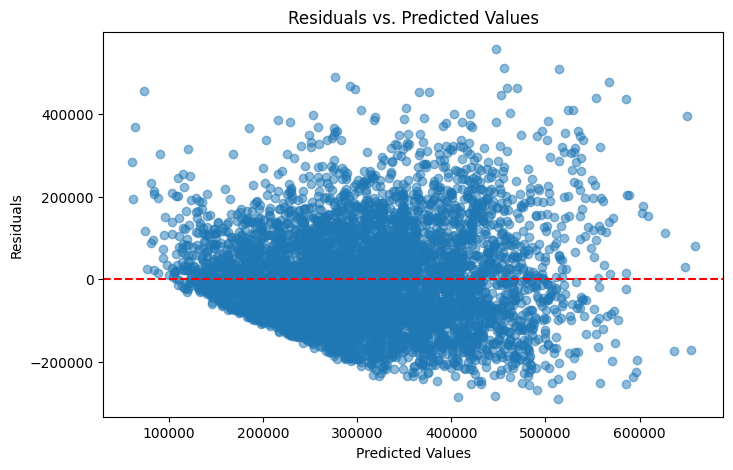

In [47]:
#G3 - Verification of Assumptions

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

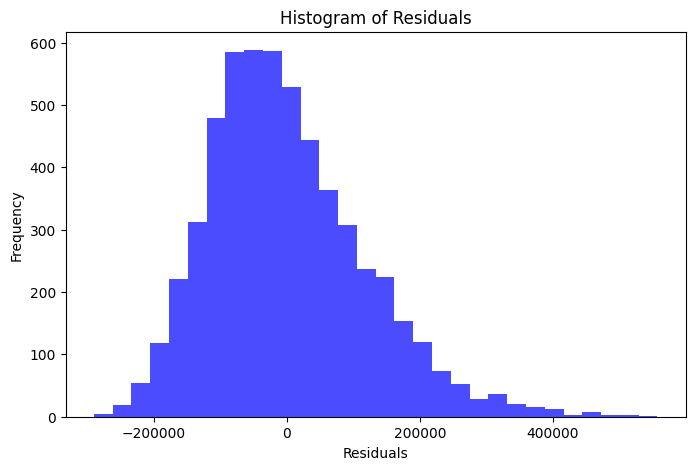

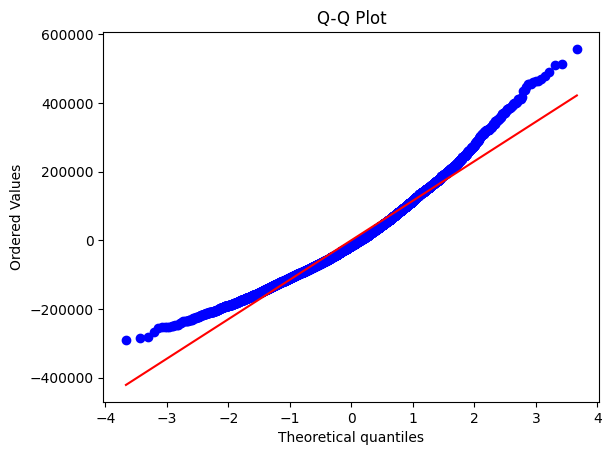

In [48]:
import scipy.stats as stats

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [49]:
from statsmodels.stats.stattools import durbin_watson

# Perform Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.990750512007732
